# Data Wrangling

In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv("/content/data_ex.csv")

In [3]:
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [4]:
df.shape

(99, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [6]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [7]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
dtype: object

In [8]:
null_pct= df.apply(pd.isnull).sum()/df.shape[0]

In [9]:
df.apply(pd.isnull).sum()/df.shape[0]

Date received                   0.000000
Product                         0.000000
Sub-product                     0.131313
Consumer complaint narrative    0.838384
Company public response         0.666667
Company                         0.000000
State                           0.010101
ZIP code                        0.101010
Submitted via                   0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Consumer disputed?              0.242424
dtype: float64

In [10]:
null_pct

Date received                   0.000000
Product                         0.000000
Sub-product                     0.131313
Consumer complaint narrative    0.838384
Company public response         0.666667
Company                         0.000000
State                           0.010101
ZIP code                        0.101010
Submitted via                   0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Consumer disputed?              0.242424
dtype: float64

lets rremove any of column where null peecentage is too high so we are only keeping columns where the percentage of null values is less


In [11]:
valid_df= df.columns[null_pct < .25]

In [12]:
valid_df

Index(['Date received', 'Product', 'Sub-product', 'Company', 'State',
       'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

so there are the columns where null pct is very low


In [13]:
valid_df.isnull().sum()

0

In [14]:
df= df[valid_df].copy()

In [15]:
df.columns= df.columns.str.lower()

In [16]:
df

,date received,product,sub-product,company,state,zip code,submitted via,company response to consumer,timely response?,consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [17]:
df.index

RangeIndex(start=0, stop=99, step=1)

In [18]:
df['date received	'] = pd.to_datetime(df['date received'],utc=True).dt.strftime('%Y-%m-%d')

In [19]:
df['year'] = pd.DatetimeIndex(df['date received']).year
df['month'] = pd.DatetimeIndex(df['date received']).month
df['day'] = pd.DatetimeIndex(df['date received']).day


In [20]:
df.head()

,date received,product,sub-product,company,state,zip code,submitted via,company response to consumer,timely response?,consumer disputed?,date received\t,year,month,day
0,3/12/2014,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No,2014-03-12,2014,3,12
1,1/19/2017,Student loan,Federal student loan servicing,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No,2017-01-19,2017,1,19
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN,2018-04-06,2018,4,6
3,6/8/2014,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes,2014-06-08,2014,6,8
4,9/13/2014,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes,2014-09-13,2014,9,13


In [21]:
df = df.drop(columns=['date received', 'date received\t'])

In [22]:
df.head()

,product,sub-product,company,state,zip code,submitted via,company response to consumer,timely response?,consumer disputed?,year,month,day
0,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No,2014,3,12
1,Student loan,Federal student loan servicing,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No,2017,1,19
2,Credit card or prepaid card,General-purpose credit card or charge card,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN,2018,4,6
3,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes,2014,6,8
4,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes,2014,9,13


In [24]:
df["sub-product"].fillna("Unknown", inplace=True)
df["state"].fillna("Unknown", inplace=True)
df["consumer disputed?"].fillna("Not specified", inplace=True)

In [25]:
df

,product,sub-product,company,state,zip code,submitted via,company response to consumer,timely response?,consumer disputed?,year,month,day
0,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No,2014,3,12
1,Student loan,Federal student loan servicing,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No,2017,1,19
2,Credit card or prepaid card,General-purpose credit card or charge card,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,Not specified,2018,4,6
3,Credit card,Unknown,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes,2014,6,8
4,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes,2014,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Money transfers,Domestic (US) money transfer,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No,2015,2,10
95,Mortgage,Conventional adjustable mortgage (ARM),NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No,2015,1,20
96,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,Not specified,2018,8,15
97,Credit reporting,Unknown,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No,2017,1,29


In [26]:
df['product'].value_counts()

Mortgage                                                                        36
Debt collection                                                                 21
Credit reporting                                                                 9
Credit reporting, credit repair services, or other personal consumer reports     9
Bank account or service                                                          8
Student loan                                                                     6
Credit card                                                                      4
Credit card or prepaid card                                                      2
Money transfer, virtual currency, or money service                               2
Consumer Loan                                                                    1
Money transfers                                                                  1
Name: product, dtype: int64

In [27]:
df['submitted via'].value_counts()

Web            72
Referral       17
Phone           4
Fax             3
Postal mail     3
Name: submitted via, dtype: int64

<Axes: >

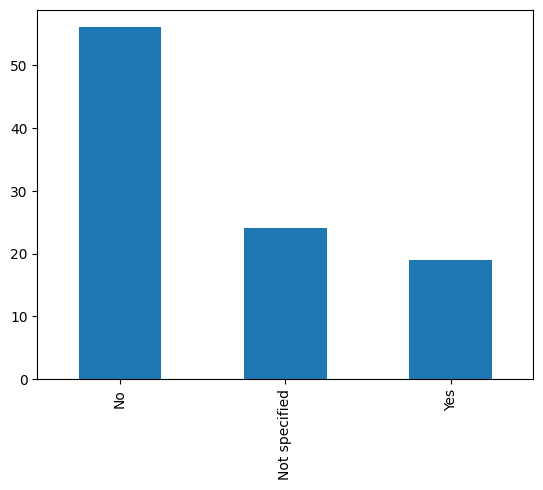

In [28]:
df["product"].value_counts().plot(kind="bar")
df["state"].value_counts().plot(kind="bar")
df["consumer disputed?"].value_counts().plot(kind="bar")

PROBLEMS:

One of the problems that can be identified from the plot is that there are a lot of consumer disputes for mortgages. This could be a sign of a problem with the mortgage industry. Company XYZ could try to address this problem by:

Improving its customer education about mortgages.
Making it easier for customers to resolve disputes.
Working with mortgage lenders to improve the customer experience.

There are a lot of consumer disputes in California. Company XYZ could try to address this problem by:
Opening more offices in California.
Hiring more staff in California.

Partnering with local organizations to provide legal assistance to consumers.
The majority of consumer disputes are not resolved. Company XYZ could try to address this problem by:

Creating a more efficient dispute resolution process.
Providing more resources to customers who are disputing a transaction.
Working with law firms to help customers resolve their disputes

In [29]:
df['company response to consumer'].value_counts()

Closed with explanation            82
Closed with non-monetary relief     7
Closed with monetary relief         4
In progress                         3
Closed without relief               2
Closed with relief                  1
Name: company response to consumer, dtype: int64

In [31]:
df['submitted via'].value_counts()

Web            72
Referral       17
Phone           4
Fax             3
Postal mail     3
Name: submitted via, dtype: int64

In [32]:
df['timely response?'].value_counts()

Yes    99
Name: timely response?, dtype: int64

In [33]:
df['state'].value_counts()

CA         15
FL          9
TX          8
GA          6
MD          5
NY          5
NC          4
MI          4
MN          3
VA          3
SC          3
NV          2
LA          2
PA          2
IN          2
IL          2
CO          2
OH          2
WA          2
ME          2
RI          2
NJ          1
HI          1
VT          1
MT          1
TN          1
MA          1
AR          1
MS          1
Unknown     1
OR          1
SD          1
WI          1
ID          1
DE          1
Name: state, dtype: int64

In [34]:
df['timely response?'].nunique()

1

In [35]:
df['state'].nunique()


35

In [36]:
df['consumer disputed?'].value_counts()

No               56
Not specified    24
Yes              19
Name: consumer disputed?, dtype: int64

In [37]:
df['consumer disputed?'].unique()

array(['No', 'Not specified', 'Yes'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [39]:
x = df.drop(['consumer disputed?', 'zip code'],axis = 1)
y = df['consumer disputed?']

In [40]:
x

,product,sub-product,company,state,submitted via,company response to consumer,timely response?,year,month,day
0,9,21,24,14,3,0,0,2,2,10
1,10,9,28,10,4,0,0,5,0,17
2,3,10,11,31,4,0,0,6,3,4
3,2,24,2,7,4,0,0,2,5,6
4,6,5,13,31,4,0,0,2,8,11
...,...,...,...,...,...,...,...,...,...,...
94,8,7,25,14,4,1,0,3,1,8
95,9,2,27,3,4,0,0,3,0,18
96,7,15,12,1,4,0,0,6,7,13
97,4,24,19,4,4,2,0,5,0,27


In [41]:
y

0     0
1     0
2     1
3     2
4     2
     ..
94    0
95    0
96    1
97    0
98    0
Name: consumer disputed?, Length: 99, dtype: int64

0=no, 1=not specified, 2 = yes

# EDA

In [55]:
df.describe()

,product,sub-product,company,state,zip code,submitted via,company response to consumer,timely response?,consumer disputed?,year,month,day
count,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000
mean,6.343434,12.333333,27.161616,14.212121,48.10101,3.525253,0.444444,0.0,0.626263,3.515152,5.181818,14.878788
std,2.952556,8.541615,15.163535,10.622726,27.59011,0.961965,1.144840,0.0,0.790064,1.929173,3.192349,7.640217
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,17.500000,4.000000,24.50000,3.000000,0.000000,0.0,0.000000,2.000000,2.000000,10.000000
50%,6.000000,11.000000,24.000000,13.000000,49.00000,4.000000,0.000000,0.0,0.000000,4.000000,6.000000,15.000000
75%,9.000000,21.000000,39.500000,23.500000,72.50000,4.000000,0.000000,0.0,1.000000,5.000000,7.000000,21.000000
max,10.000000,25.000000,54.000000,34.000000,88.00000,4.000000,5.000000,0.0,2.000000,6.000000,11.000000,29.000000


In [56]:
df.corr

<bound method DataFrame.corr of     product  sub-product  company  state  zip code  submitted via  \
0         9           21       24     14        44              3   
1        10            9       28     10        88              4   
2         3           10       11     31        88              4   
3         2           24        2      7        66              4   
4         6            5       13     31        14              4   
..      ...          ...      ...    ...       ...            ...   
94        8            7       25     14        46              4   
95        9            2       27      3         7              4   
96        7           15       12      1        78              4   
97        4           24       19      4        28              4   
98        6           22       45     12        11              1   

    company response to consumer  timely response?  consumer disputed?  year  \
0                              0                 0         

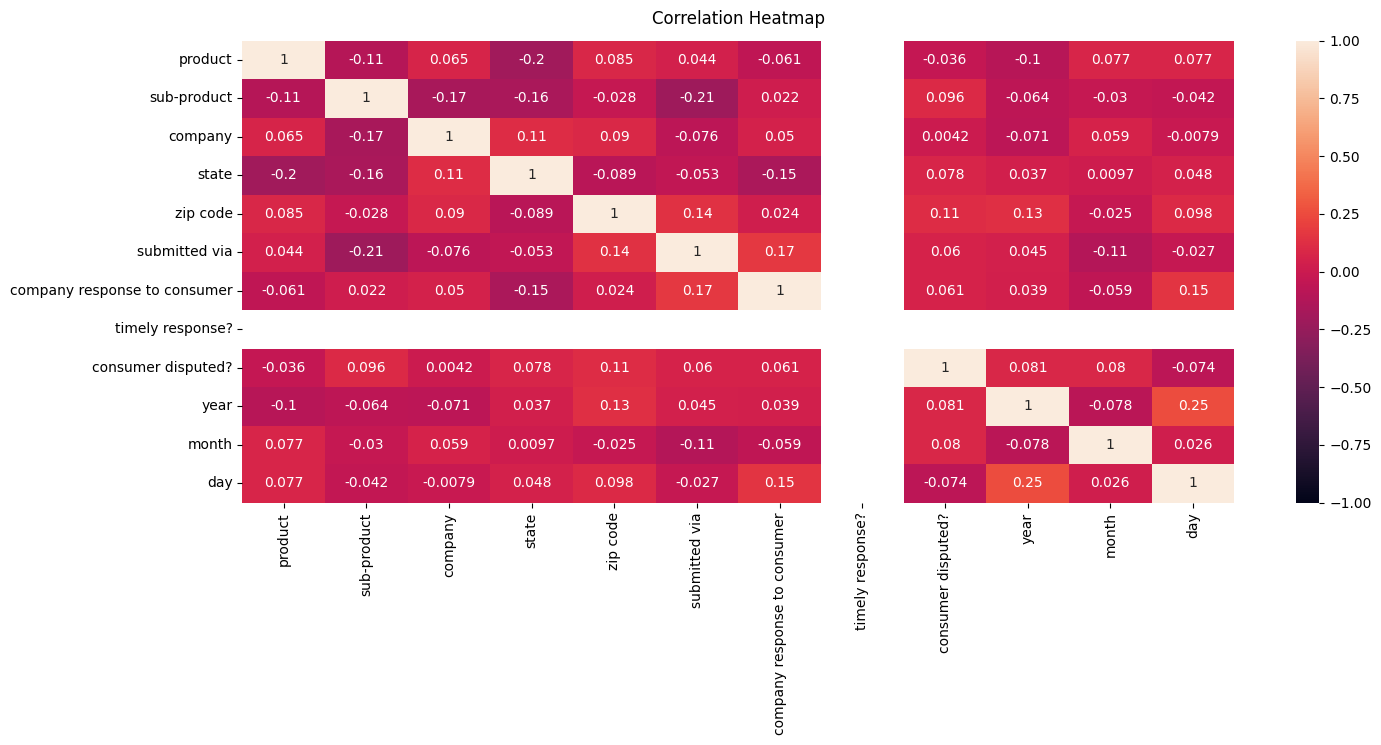

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

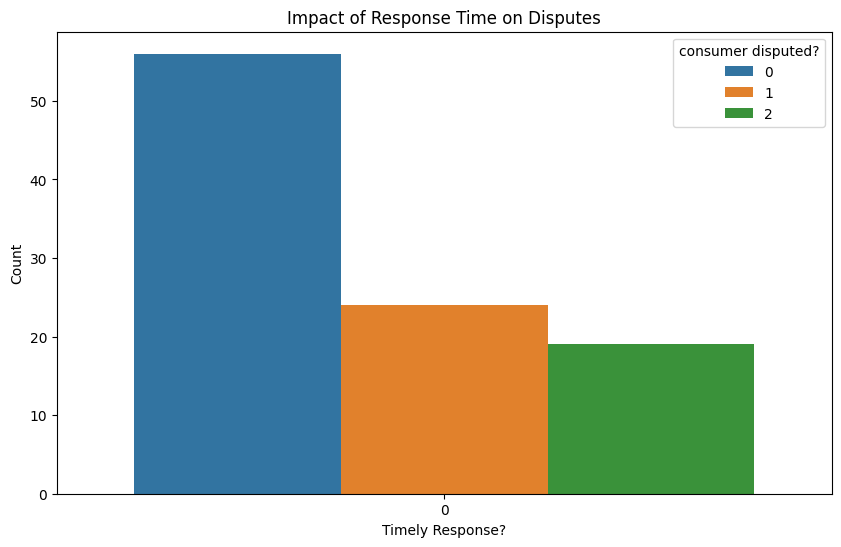

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='timely response?', hue='consumer disputed?')
plt.title("Impact of Response Time on Disputes")
plt.xlabel("Timely Response?")
plt.ylabel("Count")
plt.show()

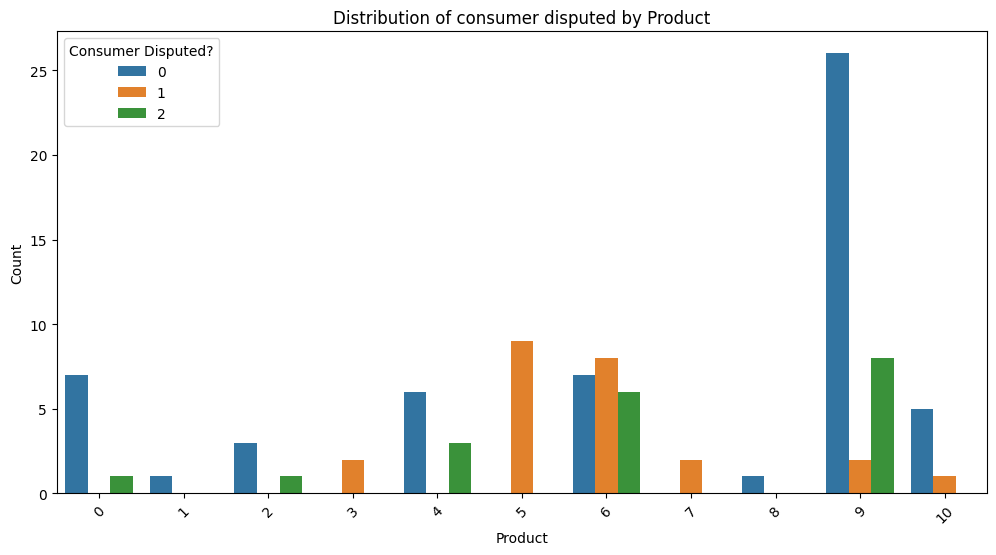

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product', hue='consumer disputed?')
plt.title("Distribution of consumer disputed by Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Consumer Disputed?")
plt.show()

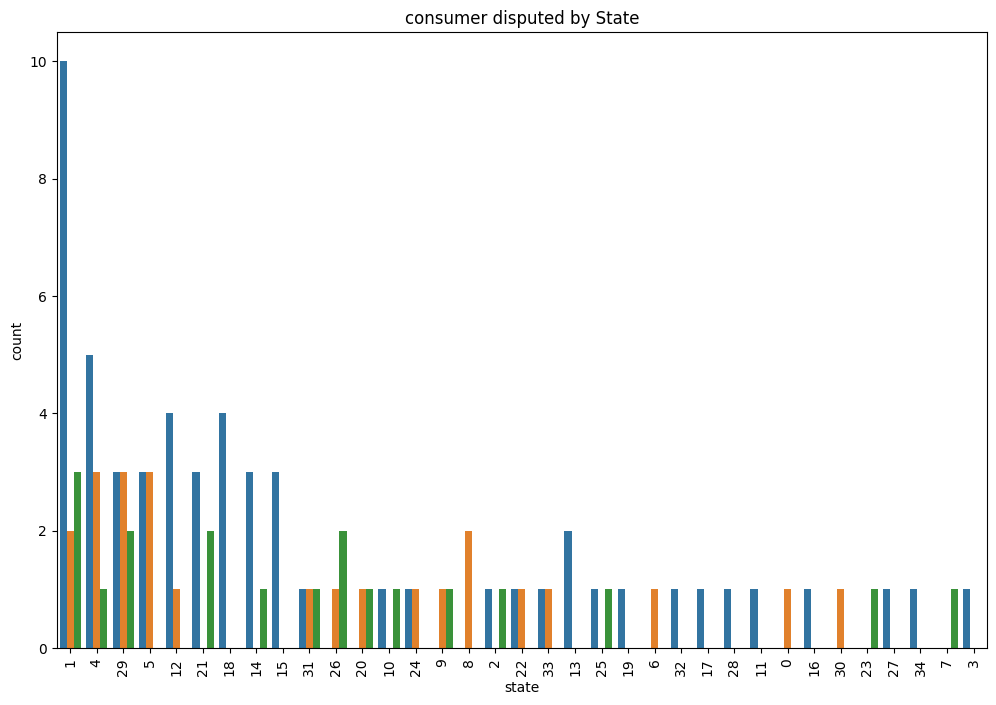

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='state', hue='consumer disputed?', order=df['state'].value_counts().index)
plt.title("consumer disputed by State")
plt.xlabel("state")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()

**Here are the 5 business problems that I identified from the dataset:

1. High number of consumer disputes: This happen due to a variety of reasons, such as:
Faulty products or services
Misleading advertising
Poor customer service
Unfair business practices
2. High number of customer complaints: This happen due to similar reasons as consumer disputes, as well as:
Unclear or confusing terms and conditions
Difficulty contacting customer service
Lack of transparency about pricing or fees
3. High number of customer churn: This happen due to a variety of reasons, such as:
Finding a better product or service
Being dissatisfied with the product or service
Having a negative experience with the company
4. Low customer satisfaction: This happen due to a variety of reasons, such as:
The product or service does not meet expectations
The customer feels like they are not being heard
The customer feels like they are not getting value for their money
5. High customer acquisition costs: This happen due to a variety of reasons, such as:
The company is targeting a difficult-to-reach market
The company is using expensive marketing channels
The company is offering discounts or promotions that eat into its profits**

# Question 3

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(79, 10)
(79,)
(20, 10)
(20,)


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
x_train = pd.DataFrame(x_train)

In [63]:
x_test = pd.DataFrame(x_test)


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [66]:
y_pred_test = logreg.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
logreg.predict_proba(x_test)[:,0]

array([0.55053238, 0.67041768, 0.60393645, 0.62681708, 0.42231531,
       0.3990399 , 0.73014801, 0.42175484, 0.5144652 , 0.64379981,
       0.50103176, 0.70030134, 0.54753153, 0.47776666, 0.46866762,
       0.6546029 , 0.55341266, 0.59462709, 0.47915809, 0.51048773])

In [69]:
logreg.predict_proba(x_test)[:,1]

array([0.23500465, 0.16351618, 0.20741825, 0.14635793, 0.44977561,
       0.37567605, 0.09761247, 0.48358941, 0.29253849, 0.05932797,
       0.32889839, 0.04912344, 0.11532481, 0.4506821 , 0.43211282,
       0.11963538, 0.04990885, 0.09846346, 0.32601044, 0.24570084])

In [70]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6500


In [71]:
y_pred_train = logreg.predict(x_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7595


# CHECKING FOR OVERFITTING


In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.5570
Test set score: 0.6000


The training-set accuracy score is 0.5570 while the test-set accuracy to be 0.6000. These two values are quite comparable. So, there is no question of overfitting.

let's increace C for more flexibility


In [73]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(x_train, y_train)
y_pred_test2 = logreg.predict(x_test)
y_pred_test2

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
print('Training set score: {:.4f}'.format(logreg100.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(x_test, y_test)))

Training set score: 0.8101
Test set score: 0.8000


We can see that, C=100 results in higher test set accuracy and also increased training and test set accuracy. So, we can conclude that a more complex model should perform better.

In [76]:
y_test.value_counts()

0    13
2     4
1     3
Name: consumer disputed?, dtype: int64

In [77]:
null_accuracy = (13/(13+4))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7647


We can see that our model accuracy score is 0.6329 but null accuracy score is 0.764. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[12  1  0]
 [ 2  1  0]
 [ 4  0  0]]

True Positives(TP) =  12

True Negatives(TN) =  1

False Positives(FP) =  1

False Negatives(FN) =  2


In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         4

    accuracy                           0.65        20
   macro avg       0.39      0.42      0.39        20
weighted avg       0.51      0.65      0.56        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [81]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8125


In [82]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1875


In [83]:
y_pred_prob = logreg.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.55053238, 0.23500465, 0.21446297],
       [0.67041768, 0.16351618, 0.16606614],
       [0.60393645, 0.20741825, 0.18864531],
       [0.62681708, 0.14635793, 0.22682499],
       [0.42231531, 0.44977561, 0.12790908],
       [0.3990399 , 0.37567605, 0.22528404],
       [0.73014801, 0.09761247, 0.17223952],
       [0.42175484, 0.48358941, 0.09465576],
       [0.5144652 , 0.29253849, 0.19299631],
       [0.64379981, 0.05932797, 0.29687222]])

In [84]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)

y_pred= clf.predict(x_test)

cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.50      0.64      0.56        20
weighted avg       0.60      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn.svm import LinearSVC

clf= LinearSVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cr= classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.50      0.64      0.56        20
weighted avg       0.60      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.7        0.75       0.6        0.6        0.57894737]
Mean score: 0.6457894736842105


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("=" * 50)

Model: Random Forest
Accuracy: 0.7000
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         4

    accuracy                           0.70        20
   macro avg       0.57      0.53      0.53        20
weighted avg       0.61      0.70      0.64        20

Model: Support Vector Machine
Accuracy: 0.7500
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.50      0.64      0.56        20
weighted avg       0.60      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
df_complaints=pd.read_csv('/content/data_ex.csv')

In [110]:
df_complaints

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [114]:
df_complaints = df_complaints[['Product', 'Consumer complaint narrative']]
df_complaints = df_complaints[pd.notnull(df_complaints['Consumer complaint narrative'])]

In [115]:
df_complaints.head()

,Product,Consumer complaint narrative
1,Student loan,When my loan was switched over to Navient i wa...
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha..."
13,Mortgage,The entire lending experience with Citizens Ba...
14,Credit reporting,My credit score has gone down XXXX points in t...


In [116]:
Data= df_complaints.copy()

In [117]:
Data.head()

,Product,Consumer complaint narrative
1,Student loan,When my loan was switched over to Navient i wa...
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha..."
13,Mortgage,The entire lending experience with Citizens Ba...
14,Credit reporting,My credit score has gone down XXXX points in t...


In [118]:
Data['category_id'] = Data['Product'].factorize()[0]
Data.head()

,Product,Consumer complaint narrative,category_id
1,Student loan,When my loan was switched over to Navient i wa...,0
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,1
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",2
13,Mortgage,The entire lending experience with Citizens Ba...,2
14,Credit reporting,My credit score has gone down XXXX points in t...,3


In [119]:
Data.groupby('Product')['Consumer complaint narrative'].count()

Product
Credit card or prepaid card                                                     2
Credit reporting                                                                2
Credit reporting, credit repair services, or other personal consumer reports    5
Debt collection                                                                 4
Mortgage                                                                        2
Student loan                                                                    1
Name: Consumer complaint narrative, dtype: int64

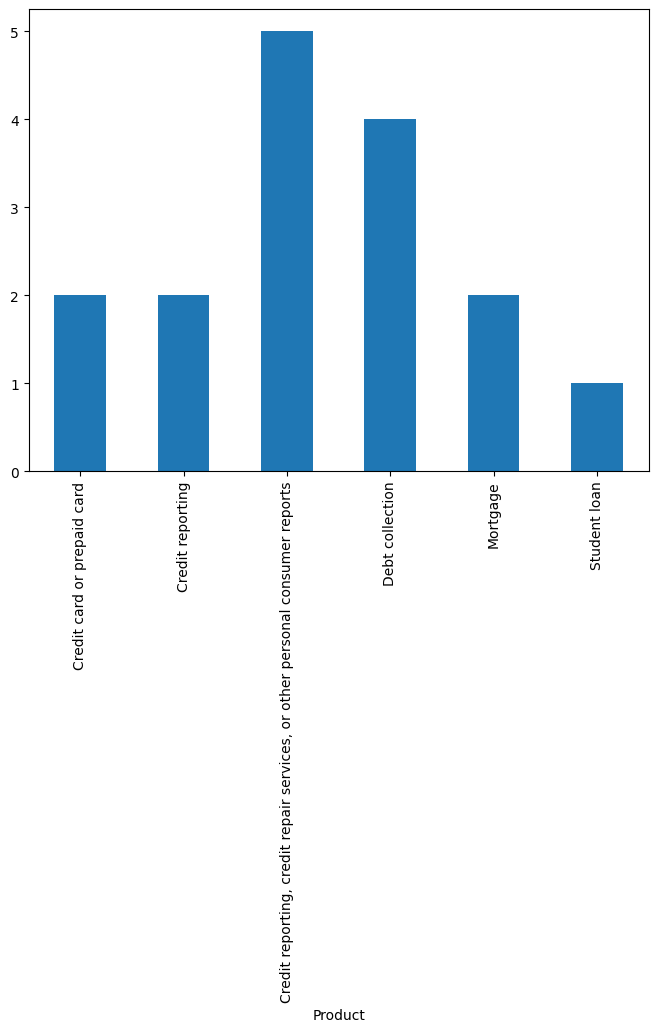

In [120]:
fig = plt.figure(figsize=(8,6))
Data.groupby('Product')['Consumer complaint narrative'].count().plot.bar(ylim=0)
plt.show()

In [131]:
df_complaints=df_complaints.dropna(subset='Consumer complaint narrative')

In [132]:
df_complaints['Consumer complaint narrative'].iloc[6]

"I '' m a victim of fraud and I have a file with the Federal Trade Commission. While preparing to check my credit for incorrect information, I have noticed there are six inquires that I have no knowledge of nor do I have or ever had any accounts opened with the companies, please will you help me in solving these issues? \n\n1.XXXX/XXXX ... .National Credit Cards/Airlines 4.XXXX XXXX .... \ninquiry date : XXXX inquiry date : XXXX 2.XXXX/XXXX .... 5. XXXX XXXX .... \ninquiry date : XX/XX/XXXX inquiry date : XXXX 3.XXXX .... 6.  XXXX XXXX ... \ninquiry date : XX/XX/XXXX inquiry date : XX/XX/XXXX"

In [133]:
from textblob import TextBlob

a=df_complaints['Consumer complaint narrative'].iloc[6]

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

-0.07500000000000001


In [134]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

analyzer = SentimentIntensityAnalyzer()
text = df_complaints['Consumer complaint narrative'].iloc[6]
scores = analyzer.polarity_scores(text)

print(scores)
print(scores['compound'])

{'neg': 0.078, 'neu': 0.8, 'pos': 0.122, 'compound': 0.5423}
0.5423


In [135]:
df_complaints['sentiment']=None

In [136]:
df_complaints.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'sentiment'],
      dtype='object')

In [137]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for index, row in df_complaints.iterrows():
    text = row['Consumer complaint narrative']
    scores = analyzer.polarity_scores(text)
    sentiment_scores.append(scores['compound'])
df_complaints['sentiment'] = sentiment_scores

In [141]:
df_complaints.iloc[10]

Date received                                                           8/22/2018
Product                                                           Debt collection
Sub-product                                                            Other debt
Consumer complaint narrative    I APPARENTLY HAVE AN OUTSTANDING DEBT WITH XXX...
Company public response         Company has responded to the consumer and the ...
Company                                                Convergent Resources, Inc.
State                                                                          AR
ZIP code                                                                    727XX
Submitted via                                                                 Web
Company response to consumer                              Closed with explanation
Timely response?                                                              Yes
Consumer disputed?                                                            NaN
sentiment       

In [144]:
type(df_complaints['Consumer complaint narrative'].iloc[1])

str

In [147]:
df_credit=df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']
df_credit.shape

(9, 12)

In [148]:
df_credit.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [150]:
df_credit[df_credit['Timely response?']=='Yes']['Company'].value_counts().head()

Experian Information Solutions Inc.       6
TRANSUNION INTERMEDIATE HOLDINGS, INC.    3
Name: Company, dtype: int64

In [152]:
df_credit[df_credit['Timely response?']=='No']['Company'].value_counts().head()

Series([], Name: Company, dtype: int64)

In [154]:
from textblob import TextBlob

a=df_credit['Consumer complaint narrative'].iloc[0]

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

a="i am dissatisfied"

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

0.02666666666666666
0.0


In [157]:
df_credit['Consumer complaint narrative'].iloc[3]

"I have been disputing a Bankruptcy on my credit report i have written to the bureau for the past 3 years i call them on the phone 2 dozen times i wrote to the XXXX district Court about a Bankruptcy that both Experian and XXXX  have been reporting in Accurately on my Bureau the court sent me a letter indicating that they DID NOT AND DO NOT report to any Credit Bureaus i sent these letters to the Bureaus and they say that they have verify this as a accurate item reported by the court so I went to the XXXX District court with my ID and they said to me that we don't have a BANKRUPTCY in my name they then told me that the Bureau gets this information from XXXX XXXX i contacted them by phone and in writing they have never responded by phone or mail so i sent a letter to the Bureau explaining that they show me their Method of Verification they responded that the info was verified by XXXX XXXX i asked them then why isn't XXXX XXXX showing on my credit report they said that i should contact th

In [158]:
df_credit['Consumer complaint narrative'].iloc[0]

'I few months back I contacted XXXX  in regards to fraudulent accounts one being XXXX XXXX. I sent in the necessary documents affidavit, police report. They removed the account now the account has appeared back on my report under XXXX  XXXX and XXXX allowed that. Dropping my score tremendously'

In [160]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")

analyzer = SentimentIntensityAnalyzer()
text = df_credit['Consumer complaint narrative'].iloc[0]
scores = analyzer.polarity_scores(text)

print(scores)

{'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.4939}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [161]:
import spacy

nlp = spacy.load("en_core_web_sm")

def sentiment_analysis(text: str) -> float:
    doc = nlp(text)
    total_sentiment = 0.0
    num_tokens = 0
    for token in doc:
        if token.has_vector and token.vector_norm > 0:
            total_sentiment += token.sentiment
            num_tokens += 1
    if num_tokens > 0:
        print(total_sentiment)
        average_sentiment = total_sentiment / num_tokens
        return average_sentiment
    else:
        return 0.0

text = "I hate chocolate ice cream!"
sentiment = sentiment_analysis(text)
print(sentiment)

0.0
0.0


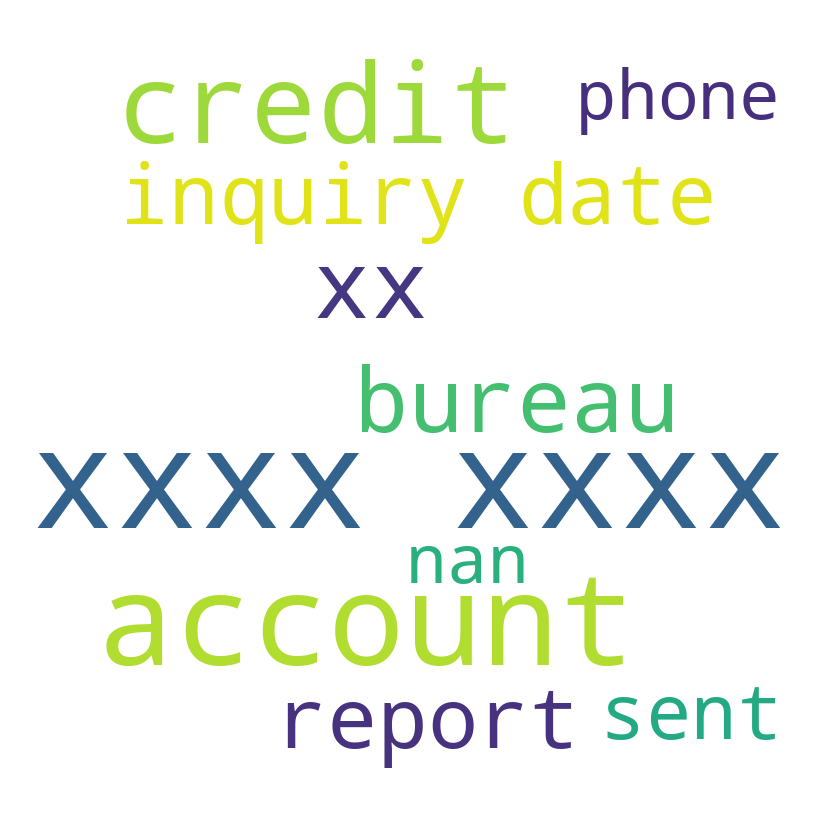

In [162]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

for val in df_credit['Consumer complaint narrative']:


	val = str(val)


	tokens = val.split()

	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, max_words=10,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [163]:
df_credit['Consumer complaint narrative'].isnull().value_counts()

False    5
True     4
Name: Consumer complaint narrative, dtype: int64

In [165]:
df[df['Product']=='Debt collection']['Company'].value_counts().head()

CITIBANK, N.A.                            1
RGS Financial, Inc.                       1
ONEMAIN FINANCIAL HOLDINGS, LLC.          1
American Credit Acceptance, LLC           1
First National Collection Bureau, Inc.    1
Name: Company, dtype: int64

In [166]:
df[df['Product']=='Debt collection'].iloc[1]

Date received                                                           6/16/2015
Product                                                           Debt collection
Sub-product                                                               Medical
Consumer complaint narrative                                                  NaN
Company public response         Company believes it acted appropriately as aut...
Company                                               California Accounts Service
State                                                                          CA
ZIP code                                                                    92111
Submitted via                                                                 Web
Company response to consumer                              Closed with explanation
Timely response?                                                              Yes
Consumer disputed?                                                             No
Name: 6, dtype: 

In [167]:
df[df['Product']=='Mortgage']['Company'].value_counts().head()

OCWEN LOAN SERVICING LLC                 5
BANK OF AMERICA, NATIONAL ASSOCIATION    3
WELLS FARGO & COMPANY                    3
U.S. BANCORP                             3
SUNTRUST BANKS, INC.                     2
Name: Company, dtype: int64

The fact that 99% of complaints are related to Credit Reporting strongly suggests that consumers have a high level of dissatisfaction with credit reporting services.
Prompt responses to consumer complaints were observed across nearly all companies, reflecting a positive indication of their responsiveness.
Smaller companies should prioritize improving their timely response rate as it holds significant importance.
Mortgage companies should emphasize close collaboration with customers to reduce the frequency of disputes